# This will be the Notebook that we use to analyze whether there has been a rise in patents surrounding online meeting technology patents after the start of the Covid Pandemic

In [1]:
# Here, we are going to load the generic g_patent and g_cpc_current DataFrames as well as our pandas, matplotlib etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set( style = 'white' )

In [2]:
# Here is a variable change in the width of the string for the columns. I am placing it here as it may need
# to be changed often, so I will move it right here!
pd.options.display.max_colwidth = 1000

In [3]:
df_patent = pd.read_csv("g_patent.tsv", delimiter='\t', dtype={'patent_id': str, 
                                                        'patent_type': str, 
                                                        'patent_title': str,
                                                        'patent_abstract': str,
                                                        'wipo_kind': str,
                                                        'num_claims': int,
                                                        'withdrawn': int,
                                                        'filename': str}, parse_dates=[2])
df_patent.head(20)

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature detection,"A frequency modulated (coherent) laser detection and ranging system includes a read-out integrated circuit formed with a two-dimensional array of detector elements each including a photosensitive region receiving both return light reflected from a target and light from a local oscillator, and local processing circuitry sampling the output of the photosensitive region four times during each sample period clock cycle to obtain quadrature components. A data bus coupled to one or more outputs of each of the detector elements receives the quadrature components from each of the detector elements for each sample period and serializes the received quadrature components. A processor coupled to the data bus receives the serialized quadrature components and determines an amplitude and a phase for at least one interfering frequency corresponding to interference between the return light and the local oscillator light using the quadrature components.",B2,20,0,ipg180619.xml
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness control method,"The injection molding machine includes a fixed platen, a moveable platen moving forward and backward by a toggle link, a base plate supporting the toggle link, a driving part for mold clamping to operate the toggle link, a driving part for mold thickness adjustment to adjust a mold thickness, and a control unit to calculate a movement distance gap before a clamping process by controlling the driving part for mold thickness adjustment to move the base plate backward and then move the base plate forward to a target movement position based on a fold amount of the toggle link, and control the driving part for mold thickness adjustment using a value obtained by deducting the movement distance gap from the fold amount of the toggle link when producing a clamp force.",B2,12,0,ipg180619.xml
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-extruded film,"The present invention relates to: a method for manufacturing a polymer film, the method including a base film forming step for co-extruding a first resin containing a polyamide-based resin and a second resin containing a copolymer including polyamide-based segments and polyether-based segments; a co-extruded film including a base film including a first resin layer containing a polyamide-based resin, and a second resin layer containing a copolymer having polyamide-based segments and polyether-based segments; to a co-extruded film including a base film including a first resin layer and a second resin layer, which have different melting points; and to a method for manufacturing a polymer film, the method including a base film forming step including a step of co-extruding a first resin and a second resin, which have different melting points.",B2,9,0,ipg180619.xml
3,10000003,utility,2018-06-19,Method for producing a container from a thermoplastic,"The invention relates to a method for producing a container (2) from a thermoplastic, having at least one surround (4), provided in the container wall (1), for a container opening. The surround (4) comprises a structure behind which parts of the container wall (1) extend and/or which is penetrated by said parts. The method is carried out using a multi-part blow mold that has at least two mold parts, each having at least one cavity, wherein the surround is placed as an insert in the cavity (10) of the blow mold (7). The method comprises pressing the preform that has been forced into the cavity (10) into the structure of the surround (4) by means of a tool which is brought to bear on the preform (12) on the side of the preform facing away from the cavity (10).",B2,18,0,ipg180619.xml
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, co-extruded, and of low thickness mad

In [4]:
df_cpc = pd.read_table("g_cpc_current.tsv", delimiter="\t", dtype={"patent_id": int,
                                                               "cpc_sequence": int,
                                                               "cpc_section": str,
                                                               "cpc_subclass": str,
                                                               "cpc_group": str,
                                                               "cpc_type": str,
                                                               "cpc_symbol_position": str})
df_cpc.head(20)

,patent_id,cpc_sequence,cpc_section,cpc_class,cpc_subclass,cpc_group,cpc_type,cpc_symbol_position
0,4796895,1,F,F16,F16H,F16H61/00,inventional,NaN
1,10913199,0,B,B29,B29C,B29C55/08,inventional,NaN
2,5208443,0,B,B29,B29C,B29C65/366,inventional,NaN
3,7830588,6,G,G09,G09G,G09G2310/0275,additional,NaN
4,7232943,1,A,A01,A01H,A01H5/10,inventional,NaN
5,10815370,2,C,C08,C08F,C08F265/08,inventional,NaN
6,8271025,4,H,H04,H04M,H04M15/00,inventional,NaN
7,8208778,1,G,G02,G02B,G02B6/12002,inventional,NaN
8,10299603,18,B,B64,B64D,B64D11/00154,inventional,NaN
9,10941581,24,B,B32,B32B,B32B2255/10,additional,NaN


In [110]:
# Here, we are going to filter our g_patent and g_cpc_current datasets so that we only get the patents
# that are related to technology, and that are 2020 and above
tech_df = df_cpc.loc[df_cpc['cpc_section'] == "Y"]
tech_df = tech_df.drop(columns=["cpc_sequence", "cpc_class", "cpc_subclass", "cpc_group", "cpc_symbol_position", "cpc_type"], axis=1)
tech_df['patent_id'] = tech_df['patent_id'].astype(str)
tech_df = pd.merge(df_patent.drop(axis=1, columns=df_patent.columns[5:]), tech_df, on="patent_id")
vm_df = tech_df[(tech_df['patent_date'] > "2015-12-31")]
vm_df['full_patent_details'] = vm_df[['patent_title', 'patent_abstract']].agg(' '.join, axis=1)
vm_df.drop(columns=["patent_title", "patent_abstract"], axis=1, inplace=True)

/var/folders/5k/1x93y75n535cnmw44c8l2xbw0000gn/T/ipykernel_65478/1323002860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vm_df['full_patent_details'] = vm_df[['patent_title', 'patent_abstract']].agg(' '.join, axis=1)
/var/folders/5k/1x93y75n535cnmw44c8l2xbw0000gn/T/ipykernel_65478/1323002860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vm_df.drop(columns=["patent_title", "patent_abstract"], axis=1, inplace=True)


In [111]:
tech_df

,patent_id,patent_type,patent_date,patent_title,patent_abstract,cpc_section
0,10000005,utility,2018-06-19,Article vacuum formation method and vacuum forming apparatus,"A vacuum forming apparatus is provided that forms an article having a covering bonded to the surface of a substrate in a molding space using a first mold and a second mold. The vacuum forming apparatus is provided with clamps for grasping the covering between the first and second molds arranged at the open positions. The clamps are movable between an interfering position, at which the clamps are located in the movement ranges of the first and second molds, and standby positions, at which the clamps are outside the movement ranges. After the covering is heated, the clamps grasping the covering move to the standby positions and stretch the covering. The first and second molds move to the closed positions and the article is molded between the first and second molds so that the stretched covering and the substrate are bonded to each other.",Y
1,10000006,utility,2018-06-19,Thermoforming mold device and a process for its manufacture and use,"A thermoforming mold device (1) providing a piece with a thin wall starting with a sheet of thermoplastic material is provided. At least one (3) of two parts of the mold (3, 3′) comprises at least one means (4) of local deformation of a sheet (2′) in the mold (3, 3′) in its closed state, the at least one means (4) comprises a piece of hollow molding with a peripheral edge, which can be connected selectively to a source of suction and can be displaced between a folded position, in which the molding piece is situated in close proximity with the wall of the thermoformed piece, and a deployed position, in which the molding piece is applied under pressure with its peripheral edge against the wall of the thermoformed piece upholding the other part of the mold.",Y
2,10000011,utility,2018-06-19,Supports for sintering additively manufactured parts,"To reduce distortion in an additively manufactured part, a shrinking platform is formed from a metal particulate filler in a debindable matrix. Shrinking supports of the same material are formed above the shrinking platform, and a desired part of the same material is formed upon them. A sliding release layer is provided below the shrinking platform of equal or larger surface area than a bottom of the shrinking platform to lateral resistance between the shrinking platform and an underlying surface. The matrix is debound sufficient to form a shape-retaining brown part assembly including the shrinking platform, shrinking supports, and the desired part. The shape-retaining brown part assembly is heated to shrink all of the components together at a same rate via atomic diffusion.",Y
3,10000017,utility,2018-06-19,Method for mounting a vortex generator and mounting apparatus for carrying out the method,"The invention relates to a method for securing an attachment (3, 33) to a component, in particular a rotor blade (1), in which the component is provided with an adhesion surface (36), the attachment (3, 33) is provided with a corresponding adhesion surface (9), the attachment (3, 33) is provided with an adhesive-conveying connection to the corresponding adhesion surface (9), the adhesion surface (36) is placed on the corresponding adhesion surface (9), a gap (53) is formed between the adhesion surface (36) and the corresponding adhesion surface (9), the attachment (3, 33) is pressed against the corresponding adhesion surface (9) and at the same time the adhesive (80) is injected into the gap (53) through the adhesive-conveying connection.",Y
4,10000017,utility,2018-06-19,Method for mounting a vortex generator and mounting apparatus for carrying out the method,"The invention relates to a method for securing an attachment (3, 33) to a component, in particular a rotor blade (1), in which the component is provided with an adhesion surface (36), the attachment (3, 33) is provided with a corresponding adhesio

In [112]:
# here we are concatinating the rows that have these certain keywords, that I personally chose as being the highest
# repeated and highest changes to being a virtual meeting patent.
meetings_df = pd.concat([vm_df.loc[vm_df['full_patent_details'].str.contains('conference', case=False)],
               vm_df.loc[vm_df['full_patent_details'].str.contains('communication', case=False)],
               vm_df.loc[vm_df['full_patent_details'].str.contains('video stream', case=False)],
               vm_df.loc[vm_df['full_patent_details'].str.contains('videoconferencing', case=False)],
               vm_df.loc[vm_df['full_patent_details'].str.contains('meeting', case=False)]], ignore_index=True)
meeting_patents_per_year = meetings_df.groupby([meetings_df['patent_date'].dt.year.rename('year')]).agg({'count'})
meeting_patents_per_year.drop(inplace=True, columns=meeting_patents_per_year.columns[1:5])

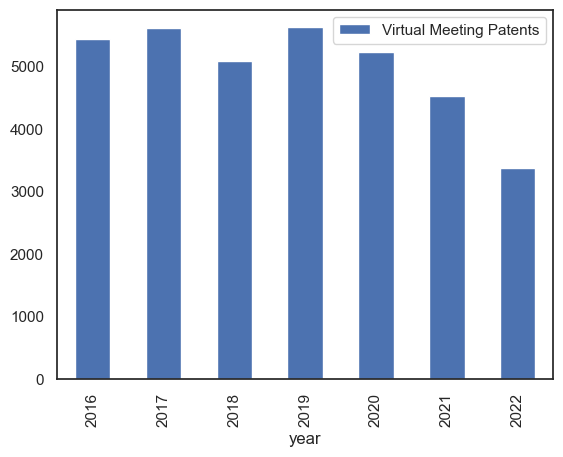

In [113]:
meeting_patents_per_year.plot(kind="bar")
plt.legend(["Virtual Meeting Patents"])

In [117]:
covid_df = tech_df.copy()
covid_df['patent_title'] = covid_df['patent_title'].astype(str)
covid_df['patent_abstract'] = covid_df['patent_abstract'].astype(str)
covid_df['full_patent_details'] = covid_df[['patent_title', 'patent_abstract']].agg(' '.join, axis=1)
covid_df.drop(columns=["patent_title", "patent_abstract"], axis=1, inplace=True)

In [130]:
total_covid = pd.concat([covid_df.loc[covid_df['full_patent_details'].str.contains('covid', case=False)],
          covid_df.loc[covid_df['full_patent_details'].str.contains('SARS-Cov-2', case=False)]], ignore_index=True)
covid_mentions_per_year = total_covid.groupby([total_covid['patent_date'].dt.year.rename('year')]).agg({'count'})
covid_mentions_per_year.drop(inplace=True, columns=covid_mentions_per_year.columns[1:5])

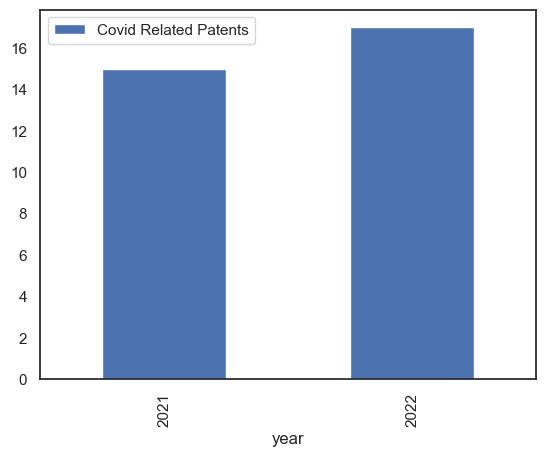

In [133]:
covid_mentions_per_year.plot(kind="bar")
plt.legend(["Covid Related Patents"])

In [136]:
all_years_covid = df_patent.copy()
all_years_covid['patent_title'] = all_years_covid['patent_title'].astype(str)
all_years_covid['patent_abstract'] = all_years_covid['patent_abstract'].astype(str)
all_years_covid['full_concept'] = all_years_covid[['patent_title', 'patent_abstract']].agg(' '.join, axis=1)
all_covid_count = pd.concat([all_years_covid.loc[all_years_covid['full_concept'].str.contains('covid', case=False)],
          all_years_covid.loc[all_years_covid['full_concept'].str.contains('SARS-Cov-2', case=False)]], ignore_index=True)
covid_result = all_covid_count.groupby([all_covid_count['patent_date'].dt.year.rename('year')]).agg({'count'})

In [140]:
covid_result.drop(columns=covid_result.columns[1:10], inplace=True)

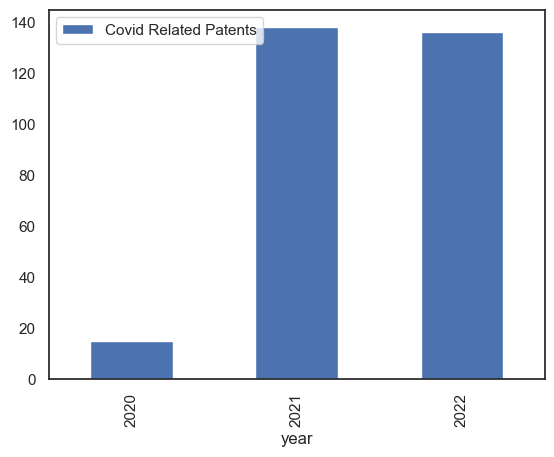

In [142]:
covid_result.plot(kind="bar")
plt.legend(["Covid Related Patents"])